In [13]:
import random
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [14]:
PROCESSED_IMAGES_DIR = Path('/home/onkar/DATASET/carvana-image-masking-challenge/processed/')

In [15]:
# random.seed(42)

class CaravanaDataset(Dataset):
    def __init__(self, root_dir) -> None:
        super(CaravanaDataset, self).__init__()
        self.all_files = self.create_file_list(root_dir)
        
    @staticmethod
    def create_file_list(root_dir):
        images = root_dir/'images'
        masks  = root_dir/'masks'
        
        # print(f'Image file : {images}, Mask file : {images}')
        
        all_files = []
        for img_fl in images.glob('*.npy'):
            mask_fl = img_fl.with_stem(img_fl.stem + '_mask').with_suffix('.npy')
            
            parts = list(mask_fl.parts)
            parts[-2] = 'masks'
            mask_fl = Path(*parts)
            
            # print(f'Image file : {img_fl}, Mask file : {mask_fl}')

            all_files.append((img_fl, mask_fl))
        
        random.shuffle(all_files)
        
        return all_files
    
    def __len__(self):
        return len(self.all_files)
    
    def __getitem__(self, idx):
        ## Apply augmentations before returning
        
        # get the item at index idx
        image, mask = self.all_files[idx]
        
        image = np.load(image).astype(np.float32)
        mask = np.load(mask).astype(np.float32)
         
        return (torch.from_numpy(image), torch.from_numpy(mask))

In [16]:
# for testing purpose only
BATCH_SIZE = 32
NUM_WORKERS = 1
PIN_MEMORY = True

image.shape : torch.Size([32, 960, 1792, 3]), mask.shape : torch.Size([32, 960, 1792])
image.shape : torch.Size([32, 3, 960, 1792]), mask.shape : torch.Size([32, 960, 1792])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


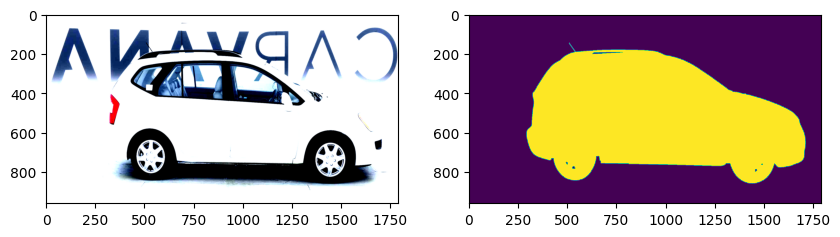

In [17]:
TRAINING_DATASET = PROCESSED_IMAGES_DIR/'train'
train_ds = CaravanaDataset(TRAINING_DATASET)
# print(len(train_ds))
# print(train_ds[0])

train_loader = torch.utils.data.DataLoader(dataset=train_ds,
                                            batch_size=BATCH_SIZE,
                                            num_workers=NUM_WORKERS,
                                            shuffle=True)

# # Fetch a single batch from the DataLoader
# data_iter = iter(train_loader)
# image1, mask1 = next(data_iter)
# print(f'image.shape : {image1.shape}, mask.shape : {mask1.shape}')
# print(f'image.shape : {image2.permute([0, 3, 1, 2]).shape}, mask.shape : {mask2.shape}')
# # print(image1, mask1)
# fig, axes = plt.subplots(1, 2, figsize=(10, 10))
# axes[0].imshow(image1[0].numpy())
# axes[1].imshow(mask1[0].numpy())
# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image.shape : torch.Size([32, 960, 1792, 3]), mask.shape : torch.Size([32, 960, 1792])
image.shape : torch.Size([32, 3, 960, 1792]), mask.shape : torch.Size([32, 960, 1792])


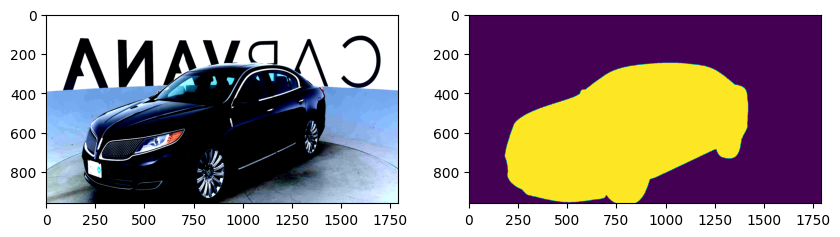

In [18]:
VALIDATION_DATASET = PROCESSED_IMAGES_DIR/'val'

valid_ds = CaravanaDataset(VALIDATION_DATASET)

# print(len(valid_ds))
# print(valid_ds[0])

val_loader = torch.utils.data.DataLoader(dataset=train_ds,
                                            batch_size=BATCH_SIZE,
                                            num_workers=NUM_WORKERS)

# # Fetch a single batch from the DataLoader
# data_iter = iter(val_loader)
# image2, mask2 = next(data_iter)
# print(f'image.shape : {image2.shape}, mask.shape : {mask2.shape}')
# print(f'image.shape : {image2.permute([0, 3, 1, 2]).shape}, mask.shape : {mask2.shape}')

# fig, axes = plt.subplots(1, 2, figsize=(10, 10))
# axes[0].imshow(image2[0].numpy())
# axes[1].imshow(mask2[0].numpy())
# plt.show()